In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('./datasets/train_cleaned.csv')
df_test = pd.read_csv('./datasets/test_cleaned.csv')

df.drop(columns='Unnamed: 0', inplace=True)
df_test.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df_test.shape

(878, 33)

In [6]:
# Convert best train features to logs

# df['gr_liv_area'] = df['gr_liv_area'].map(np.log)

# Convert best test features to logs

# df_test['gr_liv_area'] = df_test['gr_liv_area'].map(np.log)

In [7]:
df['gr_liv_area'].shape
df_test.shape

(878, 33)

In [8]:
df['gr_liv_area_sq'] = df['gr_liv_area']**2
df_test['gr_liv_area_sq'] = df_test['gr_liv_area']**2

In [9]:
# df['fe_bed_full_half_bath'] = ((df['full_bath'] + df['half_bath']/2) * df['bedrooms_gr'])
# df_test['fe_bed_full_half_bath'] = ((df_test['full_bath'] + df_test['half_bath']/2) * df_test['bedrooms_gr'])

In [10]:
df['fe_bed_full_bath'] = (df['full_bath'] * df['bedrooms_gr'])
df_test['fe_bed_full_bath'] = (df_test['full_bath'] * df_test['bedrooms_gr'])

In [11]:
# df['tot_sf'] = (df['bsmt_sf'] + df['gr_liv_area'])
# df_test['tot_sf'] = (df_test['bsmt_sf'] + df_test['gr_liv_area'])

In [13]:
# X9_features = ['lot_area', 'neighborhood', 'cond_1', 'bldg_type', 'style', 'overall_cond', 'yr_built', 'yr_remodeled', 'exter_cond', 'bsmt_sf', 'gr_liv_area', 'full_bath', 'half_bath', 'bedrooms_gr', 'kitch_qual', 'garage_type', 'cent_air','fe_bed_full_bath']

# X12_features = ['lot_area', 
#          'land_cont',
#          'neighborhood', 
#          'cond_1', 
#          'bldg_type', 
#          'style', 
#          'overall_cond', 
#          'yr_built', 
#          'yr_remodeled', 
#          'exter_cond', 
#          'bsmt_fin_1',
#          'bsmt_fin_2',
#          'bsmt_sf', 
#          'gr_liv_area', 
#          'half_bath', 
#          'kitch_qual', 
#          'garage_type',
#                 'garage_car_size',
#          'cent_air',
#                 'gr_liv_area_sq'
#         ]

X14_features = ['lot_area', 'neighborhood', 'cond_1', 'bldg_type', 'style', 
       'overall_cond', 'yr_built', 'yr_remodeled', 'exter_cond', 
       'bsmt_sf', 'gr_liv_area', 'full_bath', 'half_bath', 
       'bedrooms_gr', 'kitch_qual', 'garage_type', 'cent_air',
       'fe_bed_full_half_bath', 'gr_liv_area_sq']


X16_features = ['lot_area', 'neighborhood', 'cond_1', 'bldg_type', 
                'style', 'overall_cond', 'yr_built', 'yr_remodeled', 
                'exter_cond', 'bsmt_sf', 'gr_liv_area', 'full_bath', 
                'half_bath', 'bedrooms_gr', 'kitch_qual', 'garage_type', 
                'cent_air','fe_bed_full_bath', 'bsmt_fin_1']

X19_features = ['lot_area', 'neighborhood', 'cond_1', 'bldg_type', 
                'style', 'overall_cond', 'yr_built', 'yr_remodeled', 
                'exter_cond', 'bsmt_sf', 'gr_liv_area', 'full_bath', 
                'half_bath', 'bedrooms_gr', 'kitch_qual', 'garage_type', 
                'cent_air','fe_bed_full_bath', 'bsmt_fin_1']


X19 = df[X19_features]
X19 = pd.get_dummies(data=X19, columns=['neighborhood', 
                                      'cond_1', 'bldg_type', 'style',
                                      'exter_cond', 'kitch_qual', 
                                      'garage_type', 'cent_air', 'bsmt_fin_1'], drop_first=True)

X19_test = df_test[X19_features]
X19_test = pd.get_dummies(data=X19_test, columns=['neighborhood', 
                                      'cond_1', 'bldg_type', 'style',
                                      'exter_cond', 'kitch_qual', 
                                      'garage_type', 'cent_air', 'bsmt_fin_1'], drop_first=True)

y = df['sale_price']

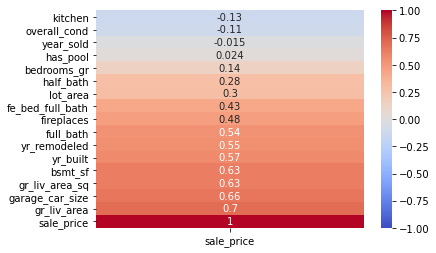

In [14]:
sns.heatmap(df.corr()[['sale_price']].sort_values('sale_price'),
            vmax=1,
            vmin=-1,
            cmap='coolwarm',
            annot=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X19, y, random_state=42)

y_test.shape
y_train.shape

y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

y_test.shape



# cross_val_score(lr, X_train, y_train_log).mean()















(513,)

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train_log)

LinearRegression()

In [19]:
pred = lr.predict(X_test)

In [20]:
residuals = y_test_log - pred

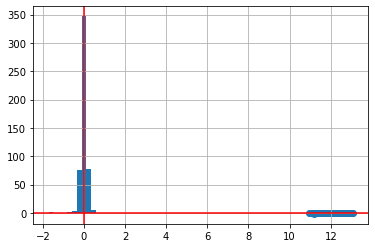

In [21]:
residuals.hist();
plt.axvline(0, color='red')

plt.scatter(pred, residuals)
plt.axhline(0, color='red');

In [22]:
SalePrice = lr.predict(X19_test)

In [23]:
SalePrice2 = np.exp(SalePrice)

In [ ]:
# y_test.map(np.log)

In [ ]:
# y.map(np.log)

In [ ]:
# X11.shape

In [ ]:
# X11_test.shape

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X19, y, random_state=42)

In [ ]:
# lr = LinearRegression()
# lr.fit(X_train, y_train_log)

In [ ]:
# train_pred = lr.predict(X_train)

In [ ]:
# lr.score(X_train, y_train)

In [ ]:
# lr.score(X_test, y_test)

In [ ]:
# SalePrice = lr.predict(X19_test)

In [ ]:
# SalePrice

In [ ]:
# SalePrice2 = np.exp(SalePrice)

In [26]:
df_test['SalePrice'] = SalePrice2

In [27]:
# df_test['SalePrice']

In [28]:
jsalisbury_20 = df_test[['Id', 'SalePrice']]

In [29]:
jsalisbury_20.head()

,Id,SalePrice
0,2658,107661.102637
1,2718,166764.316180
2,2414,200847.542393
3,1989,107814.554637
4,625,152684.268061


In [ ]:
# lr = LinearRegression()

In [ ]:
# lr.fit(X1, y)

In [ ]:
# preds = lr.predict(X1)

In [ ]:
# metrics.r2_score(y, preds)

In [ ]:
# mse = metrics.mean_squared_error(y, preds)
# np.sqrt(mse)

In [30]:
jsalisbury_20.to_csv('./datasets/jsalisbury_20.csv', index=False)